In [11]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import statsmodels
import datetime


In [12]:
df =pd.read_csv('Global+superstore+Data.csv')
df.head(12)

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200
5,28-06-2013,Corporate,APAC,2862.675,763.2750
6,07-11-2011,Consumer,APAC,1822.080,564.8400
7,14-04-2012,Consumer,APAC,5244.840,996.4800
8,14-10-2014,Corporate,US,5083.960,1906.4850
9,28-01-2012,Consumer,US,4297.644,-1862.3124


In [13]:
df.shape

(51290, 5)

In [14]:
df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [15]:
import datetime 

In [16]:
#checking range of dates
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y').dt.to_period('M')
df.head(12)

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-02,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-11,Consumer,Africa,2832.960,311.5200
5,2013-06,Corporate,APAC,2862.675,763.2750
6,2011-11,Consumer,APAC,1822.080,564.8400
7,2012-04,Consumer,APAC,5244.840,996.4800
8,2014-10,Corporate,US,5083.960,1906.4850
9,2012-01,Consumer,US,4297.644,-1862.3124


In [17]:
# creating a new column of "Market Segment" . 
df["Market Segment"] = df["Market"].astype(str) + " "+ df["Segment"]
df.head(12)

,Order Date,Segment,Market,Sales,Profit,Market Segment
0,2012-07,Consumer,US,2309.650,762.1845,US Consumer
1,2013-02,Corporate,APAC,3709.395,-288.7650,APAC Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU Home Office
4,2013-11,Consumer,Africa,2832.960,311.5200,Africa Consumer
5,2013-06,Corporate,APAC,2862.675,763.2750,APAC Corporate
6,2011-11,Consumer,APAC,1822.080,564.8400,APAC Consumer
7,2012-04,Consumer,APAC,5244.840,996.4800,APAC Consumer
8,2014-10,Corporate,US,5083.960,1906.4850,US Corporate
9,2012-01,Consumer,US,4297.644,-1862.3124,US Consumer


In [18]:
df.shape

(51290, 6)

In [19]:
df_pivot = df.pivot_table(index='Order Date', values='Profit', columns='Market Segment',aggfunc='sum')
df_pivot.head()

Market Segment,APAC Consumer,APAC Corporate,APAC Home Office,Africa Consumer,Africa Corporate,Africa Home Office,Canada Consumer,Canada Corporate,Canada Home Office,EMEA Consumer,...,EMEA Home Office,EU Consumer,EU Corporate,EU Home Office,LATAM Consumer,LATAM Corporate,LATAM Home Office,US Consumer,US Corporate,US Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [20]:
train_len = 42
train = df_pivot[0:train_len] 
test = df_pivot[train_len:] 

In [21]:
print('Train_size:',train.shape)
print('Test_size:',test.shape)

Train_size: (42, 21)
Test_size: (6, 21)


coefficient varience

In [22]:
mean = np.mean(train)
std = np.std(train)
COV = std/mean
COV = pd.DataFrame(COV)
COV = COV.reset_index()
COV.columns = ['Market_Segment','Most Consistent']
COV.sort_values(by= 'Most Consistent', ascending= True, inplace = True )
COV

,Market_Segment,Most Consistent
0,APAC Consumer,0.596404
12,EU Consumer,0.647485
15,LATAM Consumer,0.680684
13,EU Corporate,0.689346
1,APAC Corporate,0.731926
16,LATAM Corporate,0.880260
19,US Corporate,1.027209
2,APAC Home Office,1.048817
18,US Consumer,1.095295
14,EU Home Office,1.114681


# Most profitable market is APAC

In [23]:
df_new = df[df['Market Segment'] =='APAC Consumer']
df_new.head()

,Order Date,Segment,Market,Sales,Profit,Market Segment
2,2013-10,Consumer,APAC,5175.171,919.971,APAC Consumer
6,2011-11,Consumer,APAC,1822.080,564.840,APAC Consumer
7,2012-04,Consumer,APAC,5244.840,996.480,APAC Consumer
14,2013-06,Consumer,APAC,3701.520,1036.080,APAC Consumer
29,2012-02,Consumer,APAC,1878.720,582.360,APAC Consumer


dropping other columns

In [24]:
df_new =df_new.drop(columns=['Segment','Market','Profit','Market Segment'])

In [25]:
df_new.shape

(5699, 2)

In [26]:
#index made as order date
df_new = df_new.set_index('Order Date')
df_new.head()

,Sales
Order Date,
2013-10,5175.171
2011-11,1822.080
2012-04,5244.840
2013-06,3701.520
2012-02,1878.720


In [27]:
#group by order date
df_new = df_new.groupby("Order Date").sum()
df_new.head()

,Sales
Order Date,
2011-01,15711.7125
2011-02,12910.8588
2011-03,19472.5632
2011-04,15440.3046
2011-05,24348.9723


In [28]:
#order date to current date
df_new= df_new.to_timestamp()
df_new.head()

,Sales
Order Date,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723


# Time series analysis

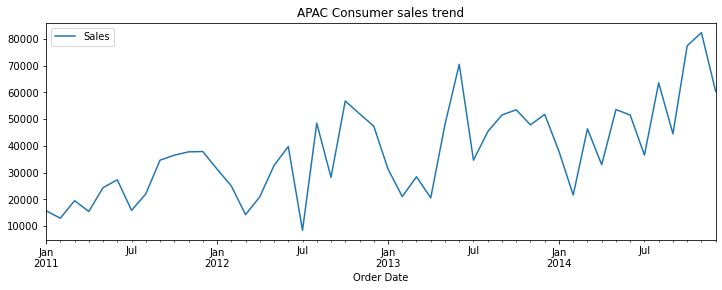

In [29]:
df_new.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('APAC Consumer sales trend')
plt.show(block=False)

# time series decomposition

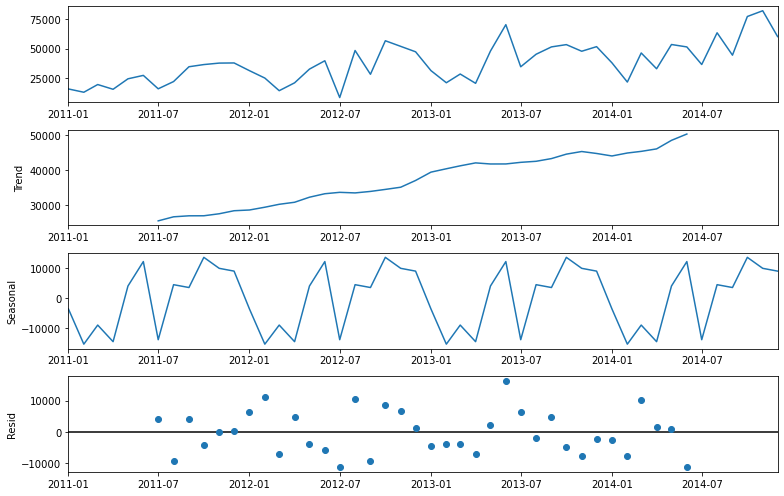

In [31]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 11, 7
decomposition = sm.tsa.seasonal_decompose(df_new, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()


multiclipcative decomposition

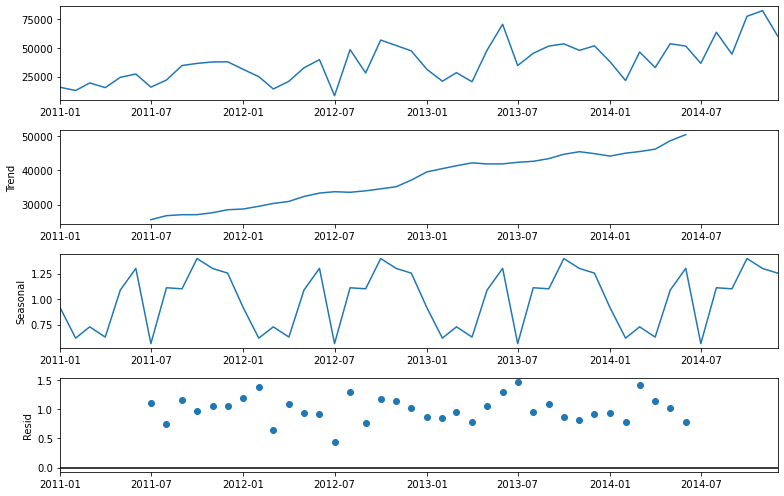

In [32]:
decomposition = sm.tsa.seasonal_decompose(df_new, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [33]:
#splitting of time series into training and test
train_len = 42
train = df_new[0:train_len]
test = df_new[train_len:] 

Navie method

In [34]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

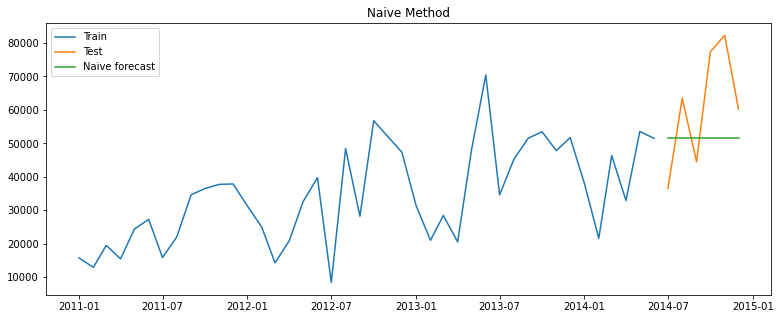

In [35]:
plt.figure(figsize=(13,5))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

RMSE AND MAPE

In [36]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86


# simple method

In [37]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

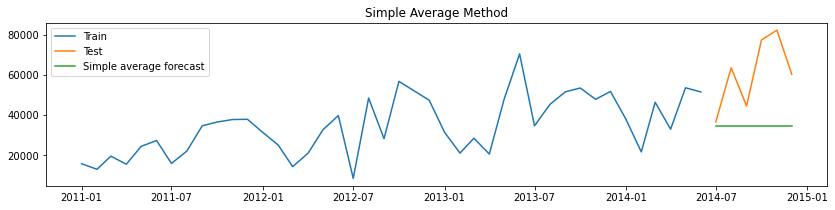

In [38]:
plt.figure(figsize=(14,3))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

RMSE AND MAPE

In [39]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18


Moving avg method

In [40]:
y_hat_sma = df_new.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = df_new['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]


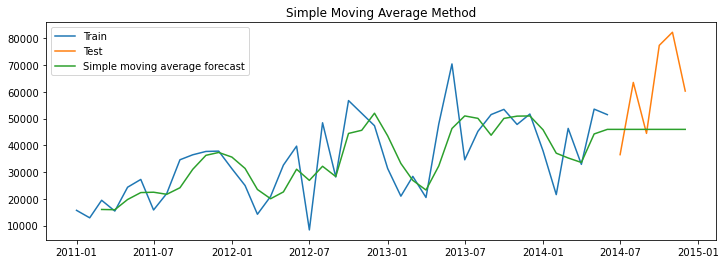

In [41]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

RMSE AND MAPE

In [42]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55


# Exponential methods

In [43]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

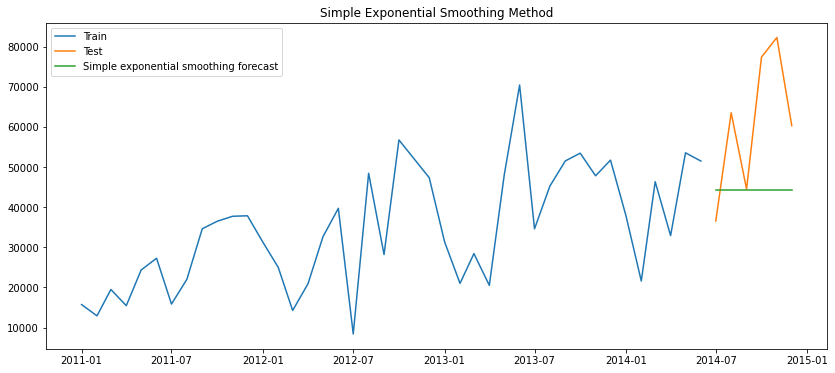

In [45]:
plt.figure(figsize=(14,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

RMSE AND MAPE

In [46]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82


# Holt's method

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 16856.24723715045, 'initial_trend': 730.3375891614132, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


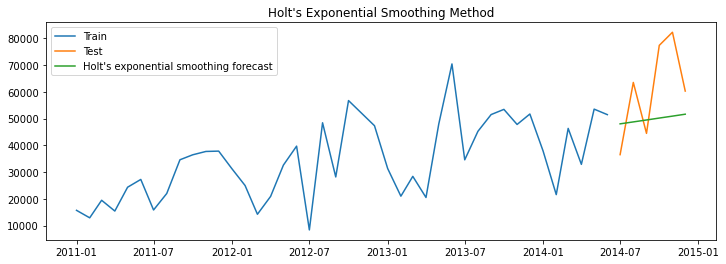

In [48]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

RSME AND MAPE

In [49]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.33,25.60


# Holt's method with trend and seasonality

In [50]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.040357142857142855, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 29061.291900000004, 'initial_trend': 730.4167145833345, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\ProgramFiles\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


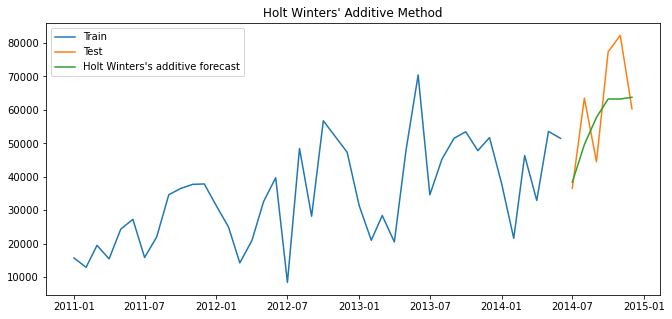

In [52]:
plt.figure(figsize=(11,5))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

RMSE AND MAPE

In [53]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.33,25.60
0,Holt Winters' additive method,12565.60,17.32


# Holt's miltiplicative method (trend and seasonality)

In [54]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.3198214285714286, 'damping_trend': nan, 'initial_level': 29061.291900000004, 'initial_trend': 730.4167145833345, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\ProgramFiles\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


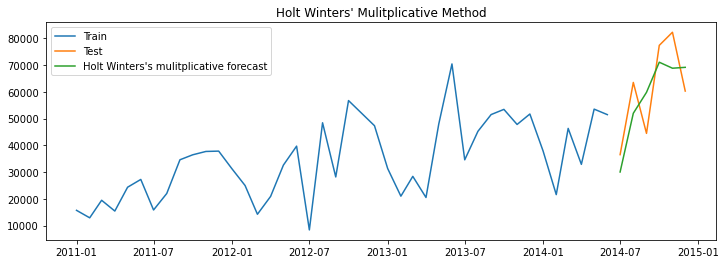

In [55]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

RMSE AND MAPE

In [56]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.33,25.60
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27


# Stationary and non-stationary

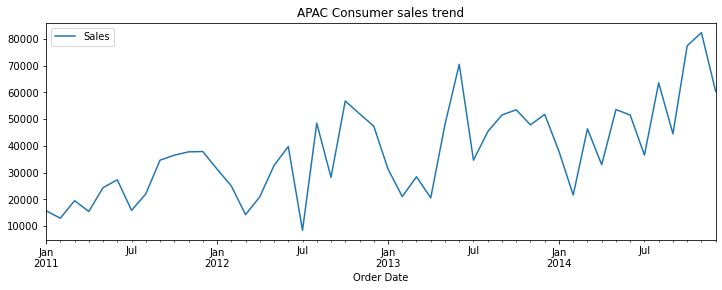

In [57]:
df_new['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('APAC Consumer sales trend')
plt.show(block=False)

In [58]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_new['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.220857
Critical Values @ 0.05: -2.93
p-value: 0.198763


In [59]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df_new['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.595515
Critical Values @ 0.05: 0.46
p-value: 0.023044


Box Cox

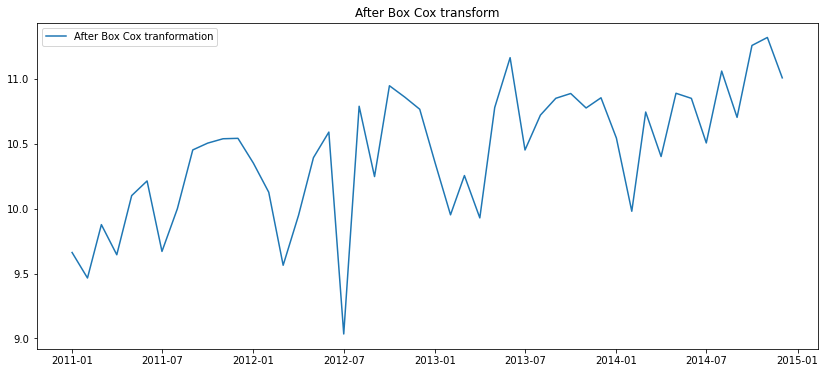

In [60]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df_new['Sales'], lmbda=0), index = df_new.index)

plt.figure(figsize=(14,6))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

differncing

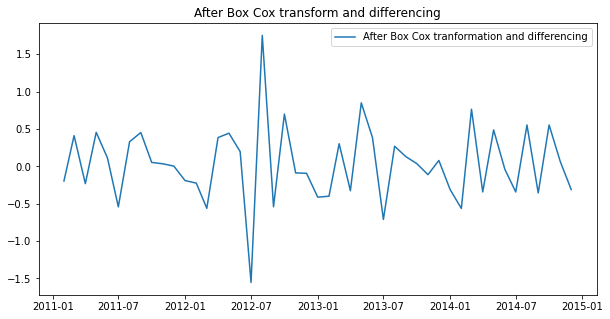

In [62]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df_new.index)
plt.figure(figsize=(10,5))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [63]:
data_boxcox_diff.dropna(inplace=True)

In [64]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.769275
Critical Values @ 0.05: -2.95
p-value: 0.000001


In [65]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.135659
Critical Values @ 0.05: 0.46
p-value: 0.100000


D:\ProgramFiles\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# ACF

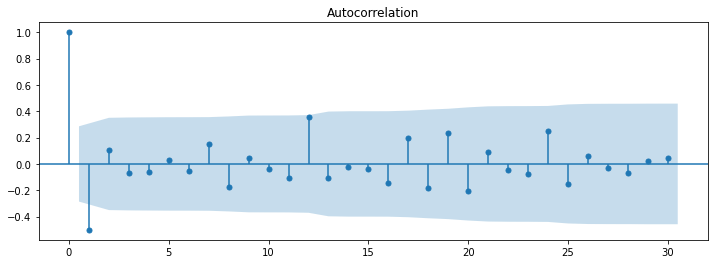

In [66]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

PACF

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 30 must be < 23.

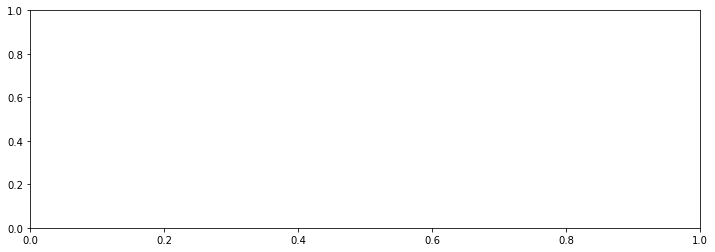

In [68]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In [69]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [70]:
train_data_boxcox_diff

Order Date
2011-02-01   -0.196338
2011-03-01    0.410938
2011-04-01   -0.232025
2011-05-01    0.455508
2011-06-01    0.112932
2011-07-01   -0.542704
2011-08-01    0.328881
2011-09-01    0.452636
2011-10-01    0.052311
2011-11-01    0.033713
2011-12-01    0.003292
2012-01-01   -0.190545
2012-02-01   -0.224703
2012-03-01   -0.562166
2012-04-01    0.384877
2012-05-01    0.443562
2012-06-01    0.197027
2012-07-01   -1.554595
2012-08-01    1.753416
2012-09-01   -0.541343
2012-10-01    0.699452
2012-11-01   -0.087925
2012-12-01   -0.093177
2013-01-01   -0.412912
2013-02-01   -0.400011
2013-03-01    0.302394
2013-04-01   -0.326054
2013-05-01    0.849926
2013-06-01    0.383940
2013-07-01   -0.710954
2013-08-01    0.268477
2013-09-01    0.129600
2013-10-01    0.036881
2013-11-01   -0.111427
2013-12-01    0.078506
2014-01-01   -0.310206
2014-02-01   -0.563617
2014-03-01    0.764032
2014-04-01   -0.342611
2014-05-01    0.487122
2014-06-01   -0.039254
Freq: MS, dtype: float64

# AR method

In [71]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.031320
ar.L1.y   -0.483978
dtype: float64


In [72]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

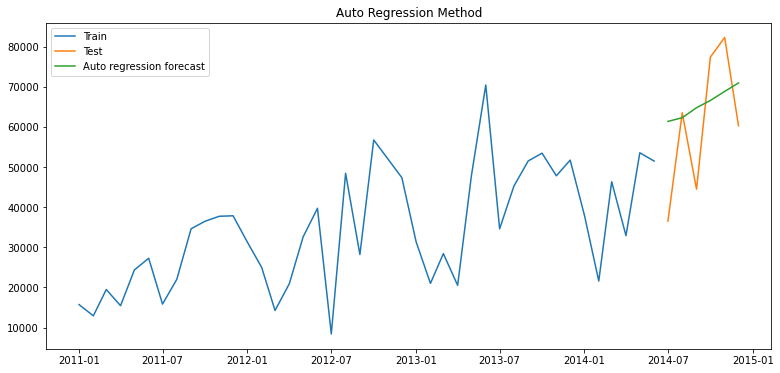

In [73]:
plt.figure(figsize=(13,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

RMSE AND MAPE

In [74]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.33,25.60
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27


# Moving method

In [75]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.022694
ma.L1.y   -1.000000
dtype: float64


In [76]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

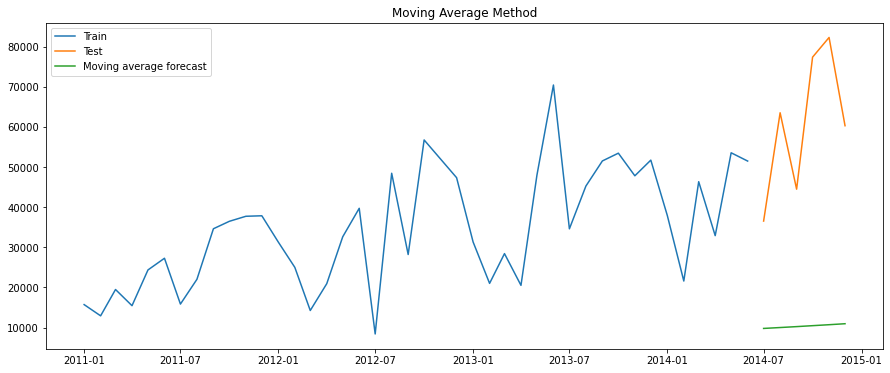

In [78]:
plt.figure(figsize=(15,6))
plt.plot(df_new['Sales'][:train_len], label='Train')
plt.plot(df_new['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

RMSE AND MAPE

In [79]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.33,25.60
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64


ARMA

In [80]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.022810
ar.L1.y    0.115922
ma.L1.y   -0.999978
dtype: float64


In [81]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

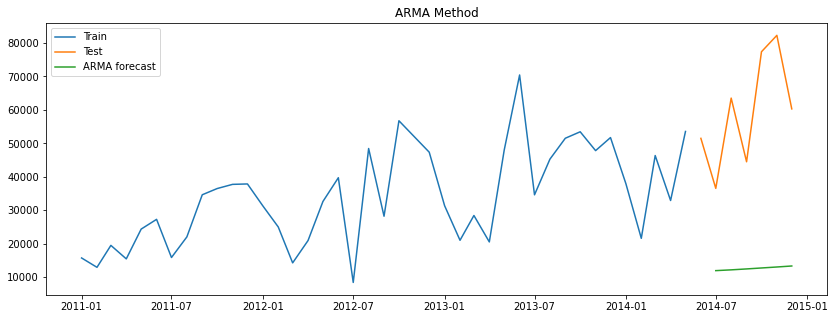

In [82]:
plt.figure(figsize=(14,5))
plt.plot( df_new['Sales'][:train_len-1], label='Train')
plt.plot(df_new['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

RMSE AND MAPE

In [83]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.33,25.60
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.92,77.66


ARIMA

In [84]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.022810
ar.L1.D.y    0.115922
ma.L1.D.y   -0.999978
dtype: float64


In [85]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

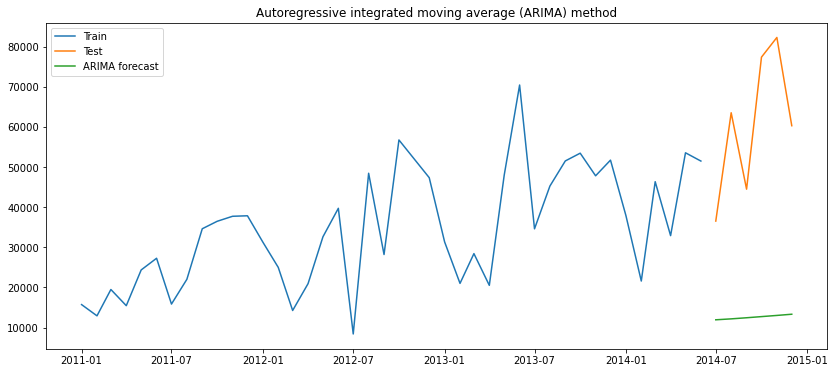

In [87]:
plt.figure(figsize=(14,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

RMSE AND MAPE

In [88]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.33,25.60
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.92,77.66


# SARIMA

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.061313
ma.L1      -0.998505
ar.S.L12   -0.709364
sigma2      0.084390
dtype: float64


In [90]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

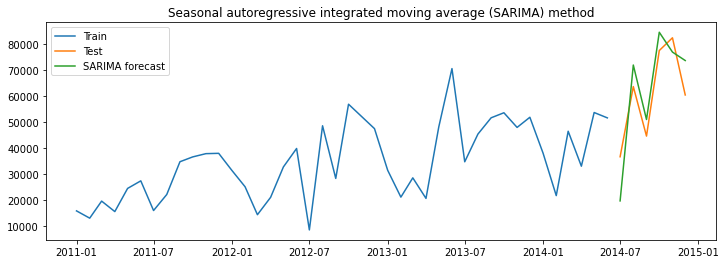

In [91]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

RMSE AND MAPE

In [92]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19026.33,25.60
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.92,77.66
